In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now we need to create a pandas dataframe from the iris dataset.

**load_iris** is a function in sklearn.datasets which is a bunch of data and target variables and the description of datset.

we use DataFrame function in the pandas library to convert the array of data to Pandas Dataframe with the columns **"Petal length"**, **"Petal Width"**, **"Sepal Length"**, **"Sepal Width"**, and **create a new column "Species"** with target values from the dataset. I have used lambda function to apply a function to convert the target values which are 0, 1, 2 to the corresponding target values(**"setosa"**, **"versicolor"**, **"virginica"**) for better understanding.

In [2]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'], columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

In [3]:
data['Species']=dataset['target']

In [4]:
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [5]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Use the function shape to **find the dimensions of the dataframe**. Which return a tuple value of rows and columns. **In our Dataset we have 150 rows/records and 5 columns/features**.

In [6]:
data.shape

(150, 5)

Use **describe()** function to see **the statistics of the dataset such as mean, median, mode, standard deviation etc**.

In [7]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We need to **verify the features are of which datatypes**. We can use **info()** function to do the same. We can see that all of the features except Species are of float datatype and Species is of object/categorical datatype.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's see, **if there are any null values present in the dataset**. **If there are any null values present** then we need to follow one of the below steps:
+ Drop records which have NA values.
+ Substitute mean value (mean if the feature is numerical or mode if the feature is categorical) of the column/feature for the NA values.
+ Fill the NA values with "?" or -9999.

In [9]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

Now we will do some **plotting/visualizing our data** to understand the relation ship between the numerical features. I have used seaborn library for plotting, we can also use python matplotlib library to visualize the data. There are different types of plots like bar plot, box plot, scatter plot etc. Scatter plot is very useful when we are analyzing **the relation ship between 2 features on x and y axis**. In seaborn library, we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.

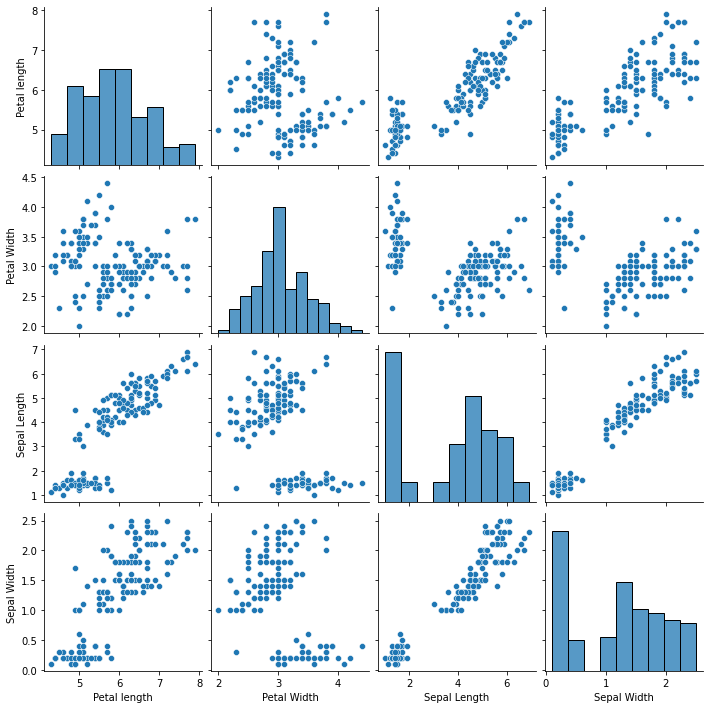

In [10]:
sns.pairplot(data)
plt.show()

Now we will see **how these features are correlated to each other using heatmap** in seaborn library. We can see that **Sepal Length** and **Sepal Width** features are slightly correlated with each other.

[]

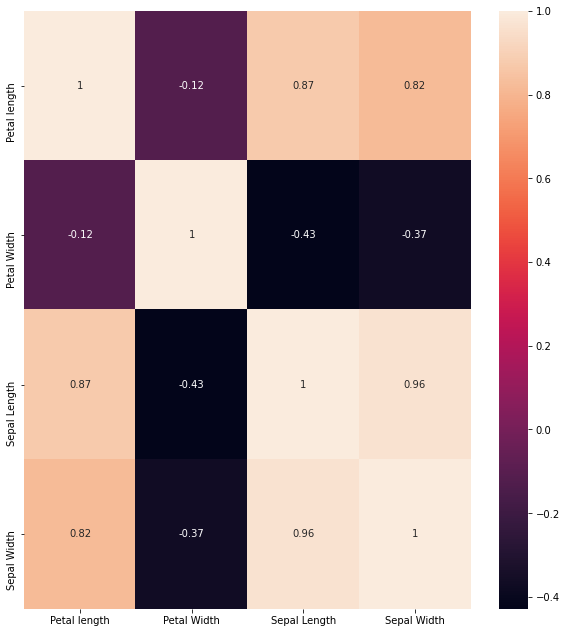

In [11]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Let's see how our data is distributed based on **Sepal Length** and **Width** features using scatterplot.

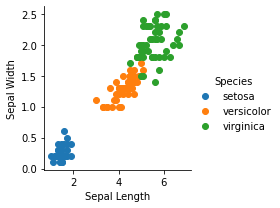

In [12]:
sns.FacetGrid(data,hue="Species").map(plt.scatter,"Sepal Length","Sepal Width").add_legend()
plt.show()

Similarly scatter plot of data based on **Petal Length** and **Width** features

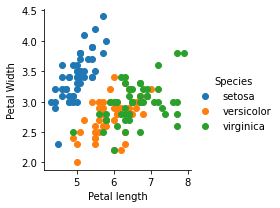

In [13]:
sns.FacetGrid(data,hue="Species").map(plt.scatter,"Petal length","Petal Width").add_legend()
plt.show()

Now let's visualize the data with violin plot of all the input variables against output variable which is Species. **The violinplot shows density of the length and width in the species**. **The thinner part denotes that there is less density whereas the fatter part conveys higher density**.

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

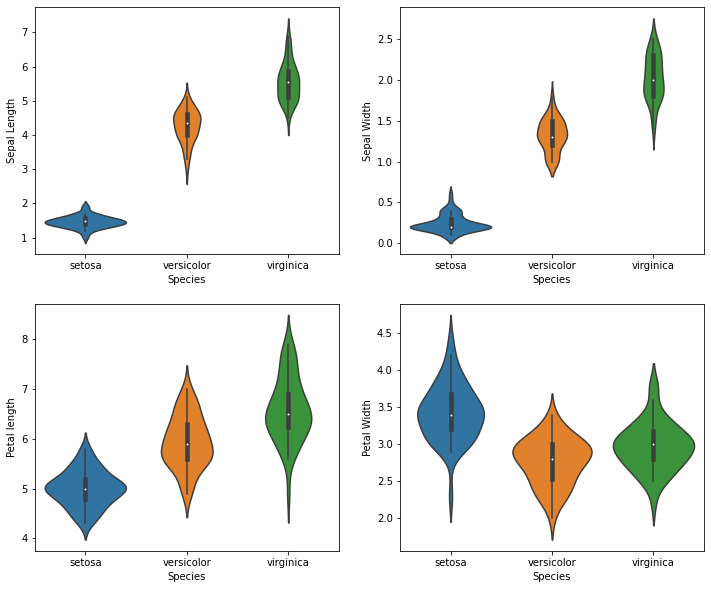

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

sns.violinplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)

sns.violinplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)

sns.violinplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)

sns.violinplot(x="Species",y="Petal Width",data=data)

And **similarly use boxplot to see how the categorical feature "Species" is distributed with all other four input variables**.

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

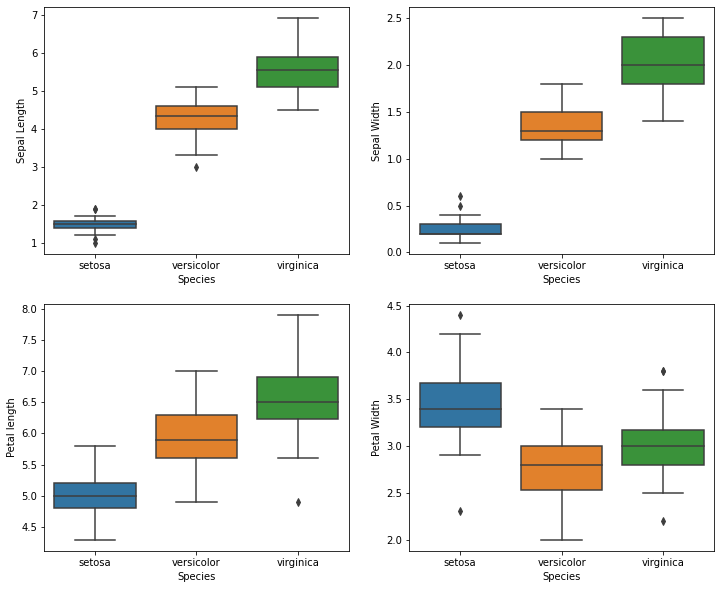

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)

sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)

sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)

sns.boxplot(x="Species",y="Petal Width",data=data)

Import sklearn libraries to build our models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier

Before implementing any model we need to **split the dataset to train** and **test sets**. We use `train_test_split` class from `sklearn.model_selection` library to split our dataset.

In [17]:
train,test=train_test_split(data,test_size=0.3)

In [18]:
train.shape, test.shape

((105, 5), (45, 5))

**Now let's split the train and test sets further as input and output sets.**

In [19]:
train_X=train[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
train_y=train.Species

In [20]:
test_X=test[['Sepal Length',"Sepal Width","Petal length","Petal Width"]]
test_y=test.Species

Let's create **SVM model** and **check the accuracy score**

In [21]:
svmmodel=svm.SVC()
svmmodel.fit(train_X,train_y)
svmprediction=svmmodel.predict(test_X)
svmaccuracy=metrics.accuracy_score(svmprediction,test_y)
print("SVM model accuracy is {}".format(svmaccuracy))

SVM model accuracy is 0.9333333333333333


**Curious about knowing which are the wrongly predicted records?**

In [22]:
svmtest_preddf=test.copy()
svmtest_preddf['Predicted Species']=svmprediction
svmwrongpred=svmtest_preddf.loc[test['Species'] != svmprediction]
svmwrongpred

,Petal length,Petal Width,Sepal Length,Sepal Width,Species,Predicted Species
83,6.0,2.7,5.1,1.6,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor


Now create the **Logistic Regression Model**

In [23]:
lrmodel=LogisticRegression()
lrmodel.fit(train_X,train_y)
lrprediction=lrmodel.predict(test_X)
lraccuracy=metrics.accuracy_score(lrprediction,test_y)
print("Logistic Regression Model Accuracy is {} ".format(lraccuracy))

Logistic Regression Model Accuracy is 0.9333333333333333 


**Curious about knowing which are the wrongly predicted records?**

In [24]:
lrtest_preddf=test.copy()
lrtest_preddf['Predicted Species']=lrprediction
lrwrongpred=lrtest_preddf.loc[test['Species'] != lrprediction]
lrwrongpred

,Petal length,Petal Width,Sepal Length,Sepal Width,Species,Predicted Species
83,6.0,2.7,5.1,1.6,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor


**Decission Tree Model**

First let's get started with Decission Trees Model.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. It uses Entropy and Information Gain to construct a decision tree.

**Entropy** controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.

**Information gain (IG)** measures how much "information" a feature gives us about the class.

In [25]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(train_X,train_y)
dtpredict=dtmodel.predict(test_X)
dtaccuracy=metrics.accuracy_score(dtpredict,test_y)
print("Decission Tree Model Accuracy is {}".format(dtaccuracy*100))

Decission Tree Model Accuracy is 93.33333333333333


**Curious about knowing which are the wrongly predicted records?**

In [26]:
dttest_preddf=test.copy()
dttest_preddf['Predicted Species']=dtpredict
dtwrongpred=dttest_preddf.loc[test['Species'] != dtpredict]
dtwrongpred

,Petal length,Petal Width,Sepal Length,Sepal Width,Species,Predicted Species
83,6.0,2.7,5.1,1.6,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor
119,6.0,2.2,5.0,1.5,virginica,versicolor
